Um franquia de restaurantes populares que oferece uma ampla variedade de pratos de culinária francesa e italiana me passou uma demanda para anilisar os dados das vendas de 'Ratatouille' no 2° semestre de 2023.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sales_2semestre = pd.read_csv("serenatto_2sem_2023.csv")
sales_2semestre.head()

,id,data,produto,valor,metodo_pagamento
0,2720,2023-07-01,Risoto de Funghi,13.0,Cartão de Débito
1,2721,2023-07-02,Tiramisù,10.0,Cartão de Débito
2,2722,2023-07-02,Tiramisù,10.0,Cartão de Crédito
3,2723,2023-07-02,Ratatouille,8.5,PIX
4,2724,2023-07-03,Ratatouille,8.5,Dinheiro


Para a análise, foram pedidos duas ações:
* Somatório de todas as vendas de 'Ratatouille' do período;
* Frequência dos métodos de pagamentos para o 'Ratatouille'.

In [27]:
somatorio_vendas = sales_2semestre.query("produto == 'Ratatouille' ").valor.sum()
somatorio_vendas

np.float64(323.0)

In [28]:
freq_metod_pag = sales_2semestre.query("produto == 'Ratatouille' ").metodo_pagamento.value_counts()
freq_metod_pag

metodo_pagamento
PIX                  13
Cartão de Débito     10
Dinheiro              9
Cartão de Crédito     6
Name: count, dtype: int64

In [29]:
print(f"A venda de Ratatouille dentro do período foram de R${somatorio_vendas}")
print(f"\nOs métodos de pagamento utilizados: \n{freq_metod_pag}")

A venda de Ratatouille dentro do período foram de R$323.0

Os métodos de pagamento utilizados: 
metodo_pagamento
PIX                  13
Cartão de Débito     10
Dinheiro              9
Cartão de Crédito     6
Name: count, dtype: int64


Moral da história:
* Utilizando a função <code> .sum() </code> para extrair o somatório das vendas (colum valor). 
* Utilizando a função <code> .value_counts() </code> para ter a quantidade total dos métodos de pagamento utilizado para aquele prato.<br>
  <sub>  obs: Consigo adentrar dentro de uma coluna específica e extrair o value_counts() apenas dela. </sub>

<hr><br>
Nova demanda -- Criar um gráfico que exiba o total de vezes que cada método de pagamento foi utilizado.

In [30]:
qtd_pagamentos = sales_2semestre["metodo_pagamento"].value_counts()
qtd_pagamentos = qtd_pagamentos.to_frame().reset_index()
qtd_pagamentos.columns = ["metodo_pagamento", "quantidade"]

qtd_pagamentos.head()

,metodo_pagamento,quantidade
0,PIX,246
1,Dinheiro,234
2,Cartão de Crédito,198
3,Cartão de Débito,178


Text(0.5, 1.0, 'Comparação dos métodos de pagamento do 2° semestre da Serenatto')

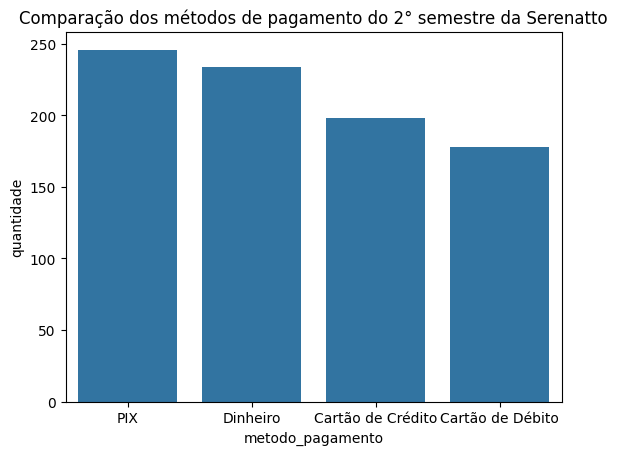

In [31]:

sns.barplot(data= qtd_pagamentos, x="metodo_pagamento", y="quantidade")
plt.title("Comparação dos métodos de pagamento do 2° semestre da Serenatto")

Essa é uma das formas de se coseguir exibir o gráfico de colunas para os métodos de pagamento. Pode notar que primeiro cria um DataFrame(df) resumido apenas com os tipos de pagamento e a frequência deles na base e na sequência utilizamos a função barplot() do Seaborn para construir um gráfico de colunas com os dados. 

<hr>

Continuação ---- nova demanda 

Preciso gerar um gráfico que apresente todas as quantidades de vendas realizadas por cada método de pagamento da empresa no 2° semestre de 2023, exceto por meio do método de pagamento "Dinheiro". Para exibir esses dados, construa o gráfico. 

In [64]:
metod_pag_excl_dinheiro = sales_2semestre.query("metodo_pagamento != 'Dinheiro'")

Text(0.5, 1.0, 'Métodos de pagamento mais utilizados (exeto do Dinheiro).')

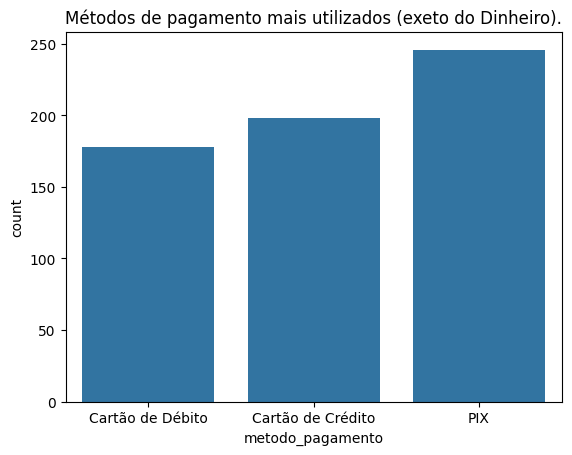

In [65]:
sns.countplot(x="metodo_pagamento", data = metod_pag_excl_dinheiro)
plt.title("Métodos de pagamento mais utilizados (exeto do Dinheiro).")

Essa é uma das formas de se conseguir criar um gráfico de colunas para métodos de pagamento como solicitado. Pode notar que primeiro filtramos os dados por meio de uma coluna 'metodo_pagamento', retirando os registros de "Dinheiro" e utilizamos o countplot() para construir um gráfico de colunas do tipo count. 